In [1]:
import pandas as pd
import re
import numpy as np

In [2]:
df = pd.read_csv('LePetitFute.csv')
df

,id,name,note,nbr_avis,type,quartier,prix
0,0,BRASSERIE DE LA TOUR EIFFEL,5/5,3,Bistrot – Brasserie,75007,€€
1,1,L'ARSENAL,"4,1/5",9,Bistrot – Brasserie,75004,€
2,2,LE CAFÉ DE PAULINE,"3,8/5",6,Cuisine française,75012,€
3,3,PARTIE DE CAMPAGNE,"2,7/5",24,Bistrot – Brasserie,75012,€
4,4,LE PAVÉ,"3,8/5",4,Cuisine française,75004,€€
...,...,...,...,...,...,...,...
6158,38,Pret A Manger,None,None,None,75008,€€
6159,39,SAS JIM ET LOD,None,None,Restaurant corse,75005,€€
6160,40,HEALTH INSIDE,None,None,Cuisine internationale – Fusion,75003,€€
6161,41,L'AUBERGE ESPAGNOLE PARIS,None,None,Restaurant insolite,75005,€€


## Mis en place de prix_valeur (df1)

In [ ]:

list_prix = []
for i in range(len(df)):
    x = df.iloc[i]
    if x['prix'] == '€':
        list_prix.append(1)
    elif x['prix'] == '€€':
        list_prix.append(2)
    elif x['prix'] == '€€€':
        list_prix.append(3)
    else:
        list_prix.append('None')
    
df1 = df.assign(PRIX_VALEUR = list_prix)
df1

## Changement du code postal 75116 en 75016 (même quartier) (df1)

In [6]:
df1["quartier"]= df1.quartier.str.replace("75116","75016", regex=True)

## Que se fait-il de plus à Paris

### Analyse par Quartier

In [ ]:
df['quartier'].value_counts()

<AxesSubplot:ylabel='quartier'>

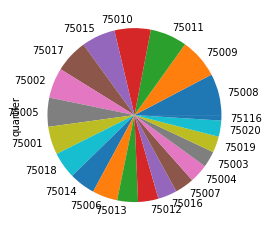

In [4]:
df['quartier'][(df['quartier'] != '69005') & (df['quartier'] != 'None')].value_counts().plot(kind='pie')

### Analyse par Type

In [ ]:
df['type'].unique()

In [ ]:
df['type'].value_counts()

<AxesSubplot:ylabel='type'>

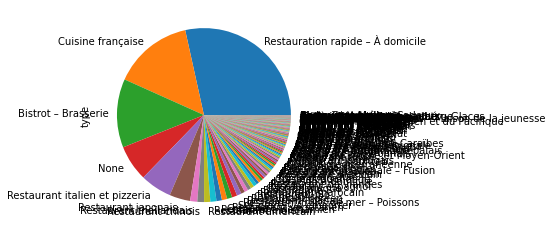

In [10]:
df['type'].value_counts().plot(kind='pie')

### Analyse par Prix

In [ ]:
df['prix'].value_counts()

In [12]:
df2 = df.copy()
df2.drop(df2.loc[df['prix']=='None'].index, inplace=True)

<AxesSubplot:ylabel='prix'>

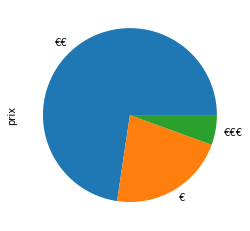

In [13]:
df2['prix'].value_counts().plot(kind='pie')

## Formatage de la DATABSE (df2)

In [ ]:
df2 = df1.copy()
df2.drop(df2.loc[df['note']=='None'].index, inplace=True)
df2.drop(df2.loc[df['nbr_avis']=='None'].index, inplace=True)

changement_note = []
for i in range(len(df2)):
    x = df2.iloc[i]
    note_valeur = re.compile(r'[0-9]').findall(x['note'])
    if len(note_valeur) == 3:
        test = (note_valeur[0]+'.'+note_valeur[1])
        changement_note.append(float(test))
    else:
        test = note_valeur[0]
        changement_note.append(float(test))
df2 = df2.assign(NOTE_VALEUR = changement_note)

changement_avis = []
for i in range(len(df2)):
    x = df2.iloc[i]
    avis_valeur = re.compile(r'[0-9]').findall(x['nbr_avis'])
    test = (avis_valeur[0])
    changement_avis.append(float(test))
df2 = df2.assign(AVIS_VALEUR = changement_avis)
df2

## Un avis?

### Par rapport au quartier

In [ ]:
x_quartier = df2['quartier'].unique()
note_quartier = sorted((df2['NOTE_VALEUR'])
                    .unique())
df_quartier = pd.DataFrame(index = note_quartier, columns = x_quartier).fillna(0)
for x in df_quartier:
    for i in range(len(df2[df2['quartier'] == x])):
        y = (df2[df2['quartier'] == x]).iloc[i]
        for i in range(len(note_quartier)):
    
            if y['NOTE_VALEUR'] == note_quartier[i]:
                df_quartier[x][note_quartier[i]] +=1    
df_quartier                      

In [16]:
temp = []
compte=0
moyenne_quartier2 = []
for yx in df_quartier.columns: 
    
    for i in range(len(df_quartier[yx])):
        x = df_quartier[yx].iloc[i]
        result = x * df_quartier[yx].index[i]
        temp.append(result)
        compte += df_quartier[yx].iloc[i]
    
    total = 0 
    for i2 in range(len(temp)):
        total+=temp[i2]
    moyenne_quartier2.append(total/compte)
moyenne_quartier = []
for i in range(len(moyenne_quartier2)):
    if df_quartier.columns[i] != 'None':
        moyenne_quartier.append([df_quartier.columns[i], moyenne_quartier2[i]])
moyenne_quartier = pd.DataFrame(moyenne_quartier).sort_values(by=1, ascending= False)
moyenne_quartier

,0,1
13,75011,3.983800
16,75005,3.982843
17,75013,3.982467
12,75016,3.979347
14,75017,3.979316
11,75003,3.977676
18,75019,3.977354
15,75008,3.976618
19,75020,3.976040
0,75007,3.969737


### Par rapport au type

In [ ]:
x_type = df2['type'].unique()
note_type = sorted((df2['NOTE_VALEUR'])
                    .unique())
df_type = pd.DataFrame(index = note_type, columns = x_type).fillna(0)

for x in df_type:
    for i in range(len(df2[df2['type'] == x])):
        y = (df2[df2['type'] == x]).iloc[i]
        for i in range(len(note_type)):
    
            if y['NOTE_VALEUR'] == note_type[i]:
                df_type[x][note_type[i]] +=1    
df_type              

In [ ]:
delete = []
for i in df_type.columns:
    if df_type[i].sum() <= 5:
        delete.append(i)
df_type = df_type.drop(delete, axis =1)
df_type

In [14]:
temp = []
compte=0
moyenne_type2 = []
for yx in df_type.columns: 
    
    for i in range(len(df_type[yx])):
        x = df_type[yx].iloc[i]
        result = x * df_type[yx].index[i]
        temp.append(result)
        compte += df_type[yx].iloc[i]
    
    total = 0 
    for i2 in range(len(temp)):
        total+=temp[i2]
    moyenne_type2.append(total/compte)
moyenne_type = []
for i in range(len(moyenne_type2)):
    if df_type.columns[i] != 'Parcs d’attractions':
        moyenne_type.append([df_type.columns[i], moyenne_type2[i]])
moyenne_type = pd.DataFrame(moyenne_type).sort_values(by=1, ascending= False)
moyenne_type

,0,1
57,Sushi,3.974168
56,Brunch,3.973691
55,Burger,3.973148
39,Restaurant végétarien,3.973027
54,Spécialités,3.972491
40,Restaurant espagnol,3.972427
44,Sur le pouce,3.972144
51,Restaurant cambodgien,3.971410
38,Restaurant turc,3.971335
52,Restaurant mexicain,3.971329


### Par rapport au prix

In [ ]:
x_prix = df2['prix'].unique()
note_prix = sorted((df2['NOTE_VALEUR'])
                    .unique())
df_prix = pd.DataFrame(index = note_prix, columns = x_prix).fillna(0)

for x in df_prix:
    for i in range(len(df2[df2['prix'] == x])):
        y = (df2[df2['prix'] == x]).iloc[i]
        for i in range(len(note_prix)):
    
            if y['NOTE_VALEUR'] == note_prix[i]:
                df_prix[x][note_prix[i]] +=1    
df_prix

In [10]:
temp = []
compte=0
moyenne_prix2 = []
for yx in df_prix.columns: 
    
    for i in range(len(df_prix[yx])):
        x = df_prix[yx].iloc[i]
        result = x * df_prix[yx].index[i]
        temp.append(result)
        compte += df_prix[yx].iloc[i]
    
    total = 0 
    for i2 in range(len(temp)):
        total+=temp[i2]
    moyenne_prix2.append(total/compte)
moyenne_prix = []
for i in range(len(moyenne_prix2)):
    if df_prix.columns[i] != 'None':
        moyenne_prix.append([df_prix.columns[i], moyenne_prix2[i]])
moyenne_prix = pd.DataFrame(moyenne_prix).sort_values(by=1, ascending= False)
moyenne_prix

,0,1
1,€,3.977961
0,€€,3.977453
2,€€€,3.975508


## Le meilleur Type de resto à Paris par Quartier est... 

In [141]:
df_final = pd.DataFrame({"classement" :range(1,6)})
for i_quartier in moyenne_quartier[0]:
    df_type_quartier = df[df['quartier'] == i_quartier]
    x_type = df_type_quartier['type'].unique()
    note_type = sorted((df2['NOTE_VALEUR'])
                        .unique())
    df_type = pd.DataFrame(index = note_type, columns = x_type).fillna(0)
    for x in df_type:
        for i in range(len(df2[df2['type'] == x])):
            y = (df2[df2['type'] == x]).iloc[i]
            for i in range(len(note_type)):
        
                if y['NOTE_VALEUR'] == note_type[i]:
                    df_type[x][note_type[i]] +=1  
    df_type 
    temp = []
    compte=0
    moyenne_type2 = []
    for yx in df_type.columns: 
        
        for i in range(len(df_type[yx])):
            x = df_type[yx].iloc[i]
            result = x * df_type[yx].index[i]
            temp.append(result)
            compte += df_type[yx].iloc[i]
        
        total = 0 
        for i2 in range(len(temp)):
            total+=temp[i2]
        moyenne_type2.append(total/compte)
    moyenne_type = []
    type_final = []
    for i in range(len(moyenne_type2)):
        if df_type.columns[i] != 'Parcs d’attractions':
            moyenne_type.append([df_type.columns[i], moyenne_type2[i]])
    moyenne_type = pd.DataFrame(moyenne_type).sort_values(by=1, ascending= False)
    for i in range(5):
        type_final.append(moyenne_type[0][i])
    df_temp = pd.DataFrame({"classement" :range(1,6), 
                                str(i_quartier) : type_final})
    df_final = df_final.merge(df_temp, on = 'classement' ,how ='outer')
df_final

,classement,75005,75013,75011,75003,75017,75116,75019,75016,75020,...,75009,75010,75002,75001,75015,75006,75014,75018,75012,75004
0,1,Cuisine méditerranéenne,Restaurant vietnamien,Restaurant canadien,Restaurant bio,Cuisine française,Restaurant d’hôtel,Cuisine du Maghreb,Bistrot – Brasserie,Restaurant indien,...,Restaurant thaïlandais,Cuisine d'Asie,Restaurant chinois,Cuisine française,Sur place – À emporter,Bistronomie,Restaurant indien,Cuisine française,Cuisine française,Bistrot – Brasserie
1,2,Cuisine française,Restaurant bio,Cuisine française,Restaurant portugais,Restaurant italien et pizzeria,Cuisine française,Bistrot – Brasserie,Cuisine française,Restaurant éthiopien,...,Cuisine française,Restaurant indien,Restaurant canadien,Bistrot – Brasserie,Restaurant coréen,Gastronomique,Restaurant vietnamien,Restaurant insolite,Bistrot – Brasserie,Cuisine française
2,3,Bistrot – Brasserie,Restaurant chinois,Restaurant thaïlandais,Restaurant coréen,Restaurant indien,Bistrot – Brasserie,Restaurant grec,Restaurant italien et pizzeria,Restaurant polonais,...,Cuisine d'Asie,Cuisine française,Cuisine française,Restaurant japonais,Restaurant japonais,Cuisine française,Bistrot – Brasserie,Bistrot – Brasserie,Sur place – À emporter,Restaurant italien et pizzeria
3,4,Restaurant argentin,Bistrot – Brasserie,Bistrot – Brasserie,Restaurant italien et pizzeria,Restaurant des Balkans,Restaurant fruits de mer – Poissons,Cuisine française,Restaurant d’hôtel,Bistrot – Brasserie,...,Restaurant péruvien,Bistrot – Brasserie,Cuisines du monde,Restaurant italien et pizzeria,Restaurant libanais,Bistrot – Brasserie,Restaurant coréen,Restaurant argentin,Restaurant japonais,Restaurant israëlien
4,5,Restaurant tibétain – népalais,Cuisine française,Restaurant insolite,Cuisine française,Restaurant japonais,Restaurant grec,Cuisine internationale – Fusion,Restaurant marocain,Restaurant japonais,...,Restaurant d’hôtel,Restaurant italien et pizzeria,Bistrot – Brasserie,Cuisine d'Asie,Restaurant italien et pizzeria,Restaurant bio,Restaurant réunionnais,Restaurant italien et pizzeria,Restaurant tibétain – népalais,Restaurant japonais


## Le meilleur Quartier pour un Type de resto à Paris est... 

In [175]:
df_final = pd.DataFrame({"classement" :range(1,4)})
for i_type in moyenne_type[0]:
    df_quartier_type = df[df['type'] == i_type]
    x_type = df_quartier_type['quartier'].unique()
    note_type = sorted((df2['NOTE_VALEUR'])
                        .unique())
    df_type = pd.DataFrame(index = note_type, columns = x_type).fillna(0)
    for x in df_type:
        for i in range(len(df2[df2['type'] == x])):
            y = (df2[df2['type'] == x]).iloc[i]
            for i in range(len(note_type)):
        
                if y['NOTE_VALEUR'] == note_type[i]:
                    df_type[x][note_type[i]] +=1  
    df_type 
    temp = []
    compte=0
    moyenne_type2 = []
    for yx in df_type.columns: 
        
        for i in range(len(df_type[yx])):
            x = df_type[yx].iloc[i]
            result = x * df_type[yx].index[i]
            temp.append(result)
            compte += df_type[yx].iloc[i]
        
        total = 0 
        for i2 in range(len(temp)):
            total+=temp[i2]
        moyenne_type2.append(total/compte)
    moyenne_type_list = []
    type_final = []
    for i in range(len(moyenne_type2)):
        if df_type.columns[i] != 'Parcs d’attractions':
            moyenne_type_list.append([df_type.columns[i], moyenne_type2[i]])
    moyenne_type = pd.DataFrame(moyenne_type_list).sort_values(by=1, ascending= False)
    for i in range(3):
        type_final.append(moyenne_type[0][i])
    df_temp = pd.DataFrame({"classement" :range(1,4), 
                                str(i_type) : type_final})
    df_final = df_final.merge(df_temp, on = 'classement' ,how ='outer')
df_final

C:\Users\User\AppData\Local\Temp\ipykernel_14500\1450227655.py:30: RuntimeWarning: invalid value encountered in double_scalars
  moyenne_type2.append(total/compte)
C:\Users\User\AppData\Local\Temp\ipykernel_14500\1450227655.py:30: RuntimeWarning: invalid value encountered in double_scalars
  moyenne_type2.append(total/compte)
C:\Users\User\AppData\Local\Temp\ipykernel_14500\1450227655.py:30: RuntimeWarning: invalid value encountered in double_scalars
  moyenne_type2.append(total/compte)
C:\Users\User\AppData\Local\Temp\ipykernel_14500\1450227655.py:30: RuntimeWarning: invalid value encountered in double_scalars
  moyenne_type2.append(total/compte)
C:\Users\User\AppData\Local\Temp\ipykernel_14500\1450227655.py:30: RuntimeWarning: invalid value encountered in double_scalars
  moyenne_type2.append(total/compte)
C:\Users\User\AppData\Local\Temp\ipykernel_14500\1450227655.py:30: RuntimeWarning: invalid value encountered in double_scalars
  moyenne_type2.append(total/compte)
C:\Users\User\Ap

,classement,Sushi,Brunch,Burger,Restaurant végétarien,Spécialités,Restaurant espagnol,Sur le pouce,Restaurant cambodgien,Restaurant turc,...,Restaurant vietnamien,Cuisine d'Asie,Cuisine française,Restaurant insolite,Restaurant thaïlandais,Restaurant américain,Bistronomie,Restaurant indien,Sur place – À emporter,Bistrot – Brasserie
0,1,75016,75002,75009,75005,75010,75008,75009,75001,75010,...,75014,75010,75012,75018,75009,75009,75006,75014,75015,75007
1,2,75003,75001,75003,75012,75006,75013,75003,75013,75017,...,75013,75009,75004,75011,75011,75005,75005,75007,75012,75004
2,3,75004,75018,75011,75010,75009,75016,75012,75010,75012,...,75018,75008,75018,75004,75018,75002,75008,75020,75001,75012


## Le pire resto de Paris est... (Baaaaaaaaaaa)

In [18]:
df_best = df[df['quartier'] == '75004']
df_best = df_best[df_best['type'] == 'Bistrot – Brasserie']
df_best = df_best[df_best['prix'] == '€€']
df_best.sort_values(by= 'note').iloc[0]

id                           46
name            PARIS BEAUBOURG
note                        1/5
nbr_avis                      1
type        Bistrot – Brasserie
quartier                  75004
prix                         €€
Name: 2966, dtype: object